In [1]:
import os
import re
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

import wrangle
import explore as exp

import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import unicodedata
import nltk
from wordcloud import WordCloud
from nltk import ngrams
import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('giant_df.csv')

# Now you can work with the DataFrame 'df'
print(df.head())

   Unnamed: 0                                 repo          language  \
0           0                  Project-MONAI/MONAI            Python   
1           1       GoogleCloudPlatform/healthcare  Jupyter Notebook   
2           2            kakoni/awesome-healthcare               NaN   
3           3  wanghaisheng/healthcaredatastandard               NaN   
4           4       HealthCatalyst/healthcareai-py            Python   

                                     readme_contents  
0  <p align="center">\n  <img src="https://raw.gi...  
1  # Cloud Healthcare\n\nThis respository contain...  
2  # Awesome Health [![Awesome](https://cdn.jsdel...  
3  healthcaredatastandard\n======================...  
4  # healthcareai\n\n[![Code Health](https://land...  


In [3]:
new_df = wrangle.prepare_data(df)

In [4]:
codeup_df = wrangle.do_everything(new_df)

In [5]:
codeup_df

,repo,language,readme_contents,clean,stemmed,lemmatized
0,Project-MONAI/MONAI,Python,"<p align=""center""> <img width=""50%"" alt='proje...",p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...
1,microsoft/HealthBotContainerSample,JavaScript,# Health Bot Container A simple web page that ...,health bot container simple web page allows us...,health bot container simple web page allows us...,health bot container simple web page allows us...
2,TheAlphamerc/flutter_healthcare_app,other,## flutter_healthcare_app ![Twitter [![GitHub ...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...
3,nextgenhealthcare/connect,Java,# Mirth® Connect by NextGen Healthcare 1. [Use...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...
4,HealthCatalyst/healthcareai-r,other,--- output: github_document --- <!-- README.md...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...
...,...,...,...,...,...,...
97,abhishek-ch/streamlit-healthcare-ML-App,Python,# Streamlit Healthcare Machine Learning Data A...,streamlit healthcare machine learning data app...,streamlit healthcare machine learning data app...,streamlit healthcare machine learning data app...
98,GoogleCloudPlatform/healthcare-api-dicomweb-cli,Python,# DICOMweb command line tool DICOMweb command ...,dicomweb command line tool dicomweb command li...,dicomweb command line tool dicomweb command li...,dicomweb command line tool dicomweb command li...
99,simpledotorg/simple-server,other,# Simple Server [![Build [![Ruby Style This is...,simple server build ruby style backend simple ...,simple server build ruby style backend simple ...,simple server build ruby style backend simple ...
100,greggersh/healthcare.gov,JavaScript,# HealthCare.gov-Open-Source-Release This proj...,healthcaregovopensourcerelease project include...,healthcaregovopensourcerelease project include...,healthcaregovopensourcerelease project include...


In [6]:
# Combine all original words into a single string
text = ' '.join(codeup_df['lemmatized'])

In [7]:
cleaned_words = exp.clean(text)

In [8]:
cleaned_words

['p',
 'aligncenter',
 'img',
 'width50',
 'altprojectmonai',
 'p',
 'medical',
 'open',
 'network',
 'ai',
 'supported',
 'python',
 'pypi',
 'documentation',
 'monai',
 'framework',
 'deep',
 'learning',
 'healthcare',
 'imaging',
 'part',
 'pytorch',
 'ambition',
 'developing',
 'community',
 'academic',
 'industrial',
 'clinical',
 'researcher',
 'collaborating',
 'common',
 'foundation',
 'creating',
 'stateoftheart',
 'endtoend',
 'training',
 'workflow',
 'healthcare',
 'imaging',
 'providing',
 'researcher',
 'optimized',
 'standardized',
 'way',
 'create',
 'evaluate',
 'deep',
 'learning',
 'model',
 'feature',
 'please',
 'see',
 'technical',
 'whats',
 'milestone',
 'release',
 'flexible',
 'preprocessing',
 'multidimensional',
 'medical',
 'imaging',
 'data',
 'compositional',
 'portable',
 'apis',
 'ease',
 'integration',
 'existing',
 'workflow',
 'domainspecific',
 'implementation',
 'network',
 'loss',
 'evaluation',
 'metric',
 'customizable',
 'design',
 'varying',
 

In [9]:
# Create a series from a list
readme_words = pd.Series(cleaned_words)

In [10]:
readme_words

0                      p
1            aligncenter
2                    img
3                width50
4        altprojectmonai
              ...       
43344               need
43345          automated
43346          reference
43347           database
43348          migration
Length: 43349, dtype: object

In [11]:
readme_words_freq = pd.Series(readme_words).value_counts().sort_values(ascending=False)
readme_words_freq.head()

data     412
run      364
using    283
file     282
use      238
dtype: int64

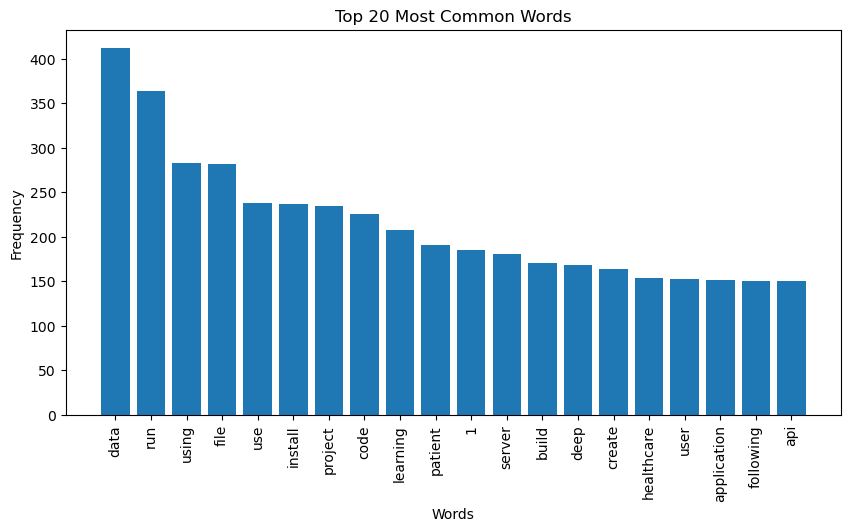

In [12]:
# Get the top 20 most common words
top_words = readme_words_freq[:20]

# Create a bar chart of the top 20 words
plt.figure(figsize=(10,5))
plt.bar(top_words.index, top_words.values)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

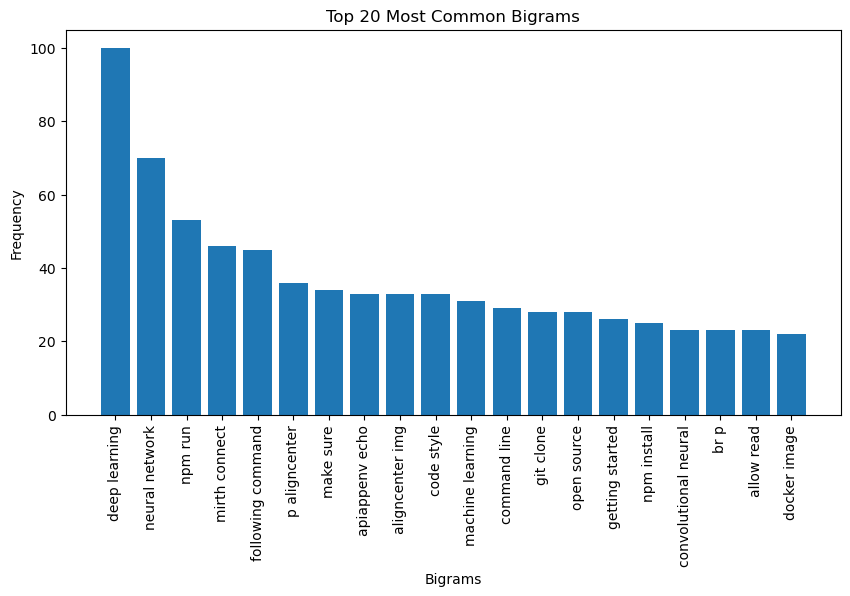

In [13]:
# Create a list of bigrams
bigrams = list(ngrams(readme_words, 2))

# Create a series from the list of bigrams
bigram_series = pd.Series(bigrams)

# Get the top 20 most common bigrams
top_bigrams = bigram_series.value_counts().head(20)

# Create a bar chart of the top 20 bigrams
plt.figure(figsize=(10,5))
plt.bar(top_bigrams.index.map(lambda x: ' '.join(x)), top_bigrams.values)
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [14]:
#create a word cloud

blog_img = WordCloud(background_color="white").generate(readme_words)
plt.imshow(blog_img)
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [11]:
python_words = exp.clean(' '.join(codeup_df[codeup_df.language=="Python"]))
java_words = exp.clean(' '.join(codeup_df[codeup_df.language=="Java"]))
javascript_words = exp.clean(' '.join(codeup_df[codeup_df.language=="JavaScript"]))
other_words = exp.clean(' '.join(codeup_df[codeup_df.language=="other"]))
all_words = exp.clean(' '.join(codeup_df))

In [13]:
java_words

['repo', 'language', 'readme_contents', 'clean', 'stemmed', 'lemmatized']